<h2>Sentiment Classification on Movie Reviews:</h2>
To classify whither a text sentence is positive/negative is pretty hard for computers to understand because they don't know how to process human language context.So inorder to teach machine's human language context we have to train them accordingly.<br />
Since this is beginning of journey to deepdive into Natural language processing,let's begin with sentiment classification problem with techniques which are quite old compared to current techniques which are used nowadays.
Overview of Techniques used in this script 

*   CountVectorizer,TF-IDF Vectorizer
*   StopWord,Lemmatization,Stemming,N-Gram


Dataset for the movie reviews are taken from <strong><em>http://ai.stanford.edu/~amaas/data/sentiment/</em></strong>

<h3>Import Libraries</h3>

In [0]:
import numpy as np
import pandas as pd
import os
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import scikitplot as skplt
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
english_stop_words = stopwords.words('english')
%matplotlib inline

<h3>Function to find optimal parameters of ML Algorithm.</h3>

In [0]:
# grid search to find the best model and accuracy for our data.
def gridsearch_best_model_and_accuracy(model, params, X, y):
    
    grid = GridSearchCV(model, # the model to grid search
    params, # the parameter set to try
    error_score=0.,
    n_jobs =-1,
    cv=5) # if a parameter set raises an error, continue and set the performance as a big, fat
    grid.fit(X, y) # fit the model and parameters
    # our classical metric for performance
    print ("Best Accuracy: {}".format(grid.best_score_))
    # the best parameters that caused the best accuracy
    print ("Best Parameters: {}".format(grid.best_params_))
    

<h3>Functions to Preprocess the Text data </h3>

In [0]:
def preprocess_reviews(reviews):
    
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    
    return reviews

def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in english_stop_words])
        )
    return removed_stop_words

def get_stemmed_text(corpus):
    stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]


def get_lemmatized_text(corpus):
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

<h3>Load the data into the python environment</h3>

In [0]:
reviews_train = []
for line in open('full_train.txt', 'r',encoding="utf8"):
    
    reviews_train.append(line.strip())
    
reviews_test = []
for line in open('full_test.txt', 'r',encoding="utf8"):
    
    reviews_test.append(line.strip())
    
train_target = [1 if i < 12500 else 0 for i in range(25000)]
test_target = [1 if i < 12500 else 0 for i in range(25000)]


<h3>Explore the dataset and look for unwanted strings,number symbols,etc and remove them accordingly</h3>

In [0]:
reviews_train[0:2]

['Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!',
 'Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything fro

In [0]:

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "
reviews_train_clean = preprocess_reviews(reviews_train)
reviews_test_clean = preprocess_reviews(reviews_test)

<h3>Lets build a baseline model for classification</h3>

In [0]:
#(cleaned data introduced to the default setting of model)
baseline_vectorizer = CountVectorizer(binary=True)
baseline_vectorizer.fit(reviews_train_clean)
X_train_baseline = baseline_vectorizer.transform(reviews_train_clean)
X_test_baseline = baseline_vectorizer.transform(reviews_test_clean)


svm = LinearSVC(random_state=10,max_iter=2000)
svm.fit(X_train_baseline, train_target)
print ("Accuracy of %s on Unseen dataset" 
       % ( accuracy_score(test_target, svm.predict(X_test_baseline))))


Accuracy of 0.848 on Unseen dataset


<h3>Lets see how much of performance increase we would get by finetuning baseline model</h3>
In SVM we have finetuned the penalty parameter,basic info regarding the parameter:<br />
C is a regularization parameter that controls the trade off between achieving a low training error
and a low testing error ,that is the ability to generalize your classifier to unseen data.
Consider the objective function of a linear SVM : min |w|^2+C∑ξ. If your C is too large the optimization
algorithm will try to reduce |w| as much as possible leading to a hyperplane which tries to classify each 
training example correctly.<br /> Doing this will lead to loss in generalization properties of the classifier.
On the other hand if your C is too small then you give your objective function a certain freedom to increase |w| a lot, 
which will lead to large training error

In [0]:
params = {'C':[ 0.05, 0.1, 0.3]
 }
svm = LinearSVC(random_state=10)
    
gridsearch_best_model_and_accuracy(svm,params,X_train_baseline, train_target)

Best Accuracy: 0.85076
Best Parameters: {'C': 0.05}


In [0]:
svm_baseline = LinearSVC(random_state=10,C=0.05)
svm_baseline.fit(X_train_baseline, train_target)
print ("Accuracy of %s on Unseen dataset" 
       % ( accuracy_score(test_target, svm_baseline.predict(X_test_baseline))))

Accuracy of 0.8676 on Unseen dataset


<h4>Increase in Accuracy by 1.96%(finetuned 0.8676 - baseline 0.848)  after finetuning the model compared to baseline model</h4>

<h5>Lets try some of the basic data cleaning process like removing Stopwords,Lemmatization,Stemming whither these will help in improvement in performance.</h5>

In [0]:
no_stop_words_train = remove_stop_words(reviews_train_clean)
no_stop_words_test = remove_stop_words(reviews_test_clean)

cv = CountVectorizer(binary=True)
cv.fit(no_stop_words_train)
X_train = cv.transform(no_stop_words_train)
X_test = cv.transform(no_stop_words_test)
params = {
          'C':[ 0.05, 0.1, 0.3]
 }
svm = LinearSVC(random_state=10)
    
gridsearch_best_model_and_accuracy(svm,params,X_train, train_target)


Best Accuracy: 0.84788
Best Parameters: {'C': 0.05}


In [0]:
svm = LinearSVC(random_state=10,C=0.05)
svm.fit(X_train, train_target)
print ("Accuracy for %s" 
       % ( accuracy_score(test_target, svm.predict(X_test))))

Accuracy for 0.86644


<h5>Accuracy decreased as compared to previous improvement(0.8676) .lets try other rest of the cleaning process</h5>

In [0]:
stemmed_reviews_train = get_stemmed_text(reviews_train_clean)
stemmed_reviews_test = get_stemmed_text(reviews_test_clean)

cv = CountVectorizer(binary=True)
cv.fit(stemmed_reviews_train)
X_train = cv.transform(stemmed_reviews_train)
X_test = cv.transform(stemmed_reviews_test)
params = {
          'C':[ 0.05, 0.1, 0.3]
 }
svm = LinearSVC(random_state=10)
    
gridsearch_best_model_and_accuracy(svm,params,X_train, train_target)

Best Accuracy: 0.84392
Best Parameters: {'C': 0.05}


In [0]:
svm = LinearSVC(random_state=10,C=0.05)
svm.fit(X_train, train_target)
print ("Accuracy for %s" 
       % ( accuracy_score(test_target, svm.predict(X_test))))

Accuracy for 0.8618


<h5>Accuracy decreased as compared to previous improvement(0.8676) .lets try other rest of the cleaning process</h5>

<h5>It seems data cleaning is not able to improve our results.lets try all preprocessing steps on data cleaning process</h5>

In [0]:
params = {
          'C':[0.01, 0.05, 0.1]
 }
no_stop_words_train = remove_stop_words(reviews_train_clean)
no_stop_words_test = remove_stop_words(reviews_test_clean)
stemmed_reviews_train = get_stemmed_text(no_stop_words_train)
stemmed_reviews_test = get_stemmed_text(no_stop_words_test)
preprocessing_train = get_lemmatized_text(stemmed_reviews_train)
preprocessing_test = get_lemmatized_text(stemmed_reviews_test)

cv = CountVectorizer(binary=True)
cv.fit(preprocessing_train)
X_train = cv.transform(preprocessing_train)
X_test = cv.transform(preprocessing_test)
svm_text = LinearSVC(random_state=10)

gridsearch_best_model_and_accuracy(svm_text,params,X_train, train_target)

Best Accuracy: 0.85712
Best Parameters: {'C': 0.01}


In [0]:
svm = LinearSVC(random_state=10,C=0.01)
svm.fit(X_train, train_target)
print ("Accuracy for %s" 
       % ( accuracy_score(test_target, svm.predict(X_test))))

Accuracy for 0.8736


<h5>Accuracy Increased as compared to previous improvement by 0.60%.lets try ngrams and remove the above time consuming data cleaning methods</h5>

In [0]:
#stop_words = ['in', 'of', 'at', 'a', 'the']
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3))
ngram_vectorizer.fit(reviews_train_clean)
X_train = ngram_vectorizer.transform(reviews_train_clean)
X_test = ngram_vectorizer.transform(reviews_test_clean)

params = {
          'C':[0.01, 0.05, 0.1]
          
 }
svm = LinearSVC(random_state=10)
    
gridsearch_best_model_and_accuracy(svm,params,X_train, train_target)

Best Accuracy: 0.88356
Best Parameters: {'C': 0.01}


In [0]:
svm = LinearSVC(random_state=10,C=0.01)
svm.fit(X_train, train_target)
print ("Accuracy for %s" 
       % ( accuracy_score(test_target, svm.predict(X_test))))

Accuracy for 0.8984


<h5>Lets try TF-IDF concept along with Ngrams to vectorize our data to see whither we can beat 89.84% accuracy</h5>

In [0]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),use_idf=True)
tfidf_vectorizer.fit(reviews_train_clean)
X_train = tfidf_vectorizer.transform(reviews_train_clean)
X_test = tfidf_vectorizer.transform(reviews_test_clean)
params = {
          'C':[ 0.1, 0.3,0.4,0.5,0.6]
 }
svm_tfidf = LinearSVC(random_state=10)
    
gridsearch_best_model_and_accuracy(svm_tfidf,params,X_train, train_target)


Best Accuracy: 0.87844
Best Parameters: {'C': 0.5}


In [0]:
svm_tfidf = LinearSVC(random_state=10,C=0.5)
svm_tfidf.fit(X_train, train_target)
print ("Accuracy for %s" 
       % ( accuracy_score(test_target, svm_tfidf.predict(X_test))*100))

Accuracy for 90.064


<h4>The final accuracy for text sentiment classification came around 90.06% using TF-IDF</h4>
<h5>1. Increase in accuracy by 0.224% as compared to countvectorization<br />
2. Stopwords,stemming,lemmatization din't help much in our case<br />
3. Concept of ngrams & tunning the penalty parameter of SVM helped to get Best Accuracy<br />
4. 5.264% increase in accuracy as compared to baseline model.</h5>

In [0]:
print(classification_report(test_target, svm_tfidf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     12500
           1       0.90      0.90      0.90     12500

    accuracy                           0.90     25000
   macro avg       0.90      0.90      0.90     25000
weighted avg       0.90      0.90      0.90     25000



<strong><em>Precision:</em></strong>“When it predicts the positive result, how often is it correct?”<br />
<strong><em>Recall:</em></strong> “When it is actually the positive result, how often does it predict correctly?”<br />


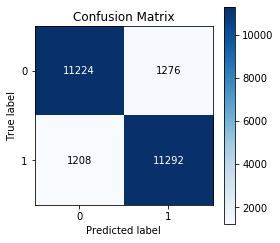

In [0]:
skplt.metrics.plot_confusion_matrix(
    test_target, 
    svm_tfidf.predict(X_test),
    figsize=(4,4))


<h4> First 6 Feature's co-efficients which contibutes for positive & negative reviews in IMDB </h4>

In [0]:
feature_to_coef = {
    word: coef for word, coef in zip(
        tfidf_vectorizer.get_feature_names(), svm_tfidf.coef_[0]
    )
}
print('Contribution for Positive Reviews')
for best_positive in sorted(feature_to_coef.items(), key=lambda x: x[1], reverse=True)[:6]:print (best_positive)
print('Contribution for Negative Reviews')
print("\n\n")
for best_negative in sorted(feature_to_coef.items(), key=lambda x: x[1])[:6]:print (best_negative)

Contribution for Positive Reviews
('great', 3.865311287273291)
('excellent', 3.2035549017072382)
('perfect', 2.506533970257332)
('wonderful', 2.43069456517306)
('fun', 2.249218218203249)
('amazing', 2.1479506250868106)
Contribution for Negative Reviews



('worst', -4.072753270965381)
('bad', -4.004675511804091)
('awful', -3.4326282813211333)
('boring', -3.2191988533498925)
('the worst', -3.162329177967824)
('poor', -3.096018355072262)


**Next Version of notebook will be containing some of advance technique like Word Embedding via Word2Vec and Glove embeddings which are part of transfer learning.And later we will go through with transfer leaning via ULMFIT, BERT,ROBERTA and cross verify whither there is any improvements in the final results**